# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from urllib.request import urlretrieve
from os.path import isfile, isdir
from os import remove
from tqdm import tqdm
from time import time
import zipfile

# Load the file from it source
#cifar10_dataset_folder_path = 'traffic-sign-data'

# Use Floyd's cifar-10 dataset if present
traffic_signs_location_zip = 'traffic-signs-data.zip'
traffic_signs_location = 'traffic-signs-data'
if isfile(traffic_signs_location_zip):
    zip_path = traffic_signs_location_zip
else:
    zip_path = 'traffic-signs-data.zip'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isdir(traffic_signs_location):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Traffic Sign Dataset') as pbar:
        urlretrieve(
            'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip',
            zip_path,
            pbar.hook)
        
if not isdir(traffic_signs_location):
    with zipfile.ZipFile(zip_path,"r") as zip_ref:
        zip_ref.extractall(traffic_signs_location)
    remove(zip_path)
# TODO: Fill this in based on where you saved the training and testing data

training_file = traffic_signs_location + "/train.p"
validation_file= traffic_signs_location + "/valid.p"
testing_file = traffic_signs_location + "/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(np.hstack((y_train,y_valid,y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (20, 6)
import seaborn as sns
import random as rd


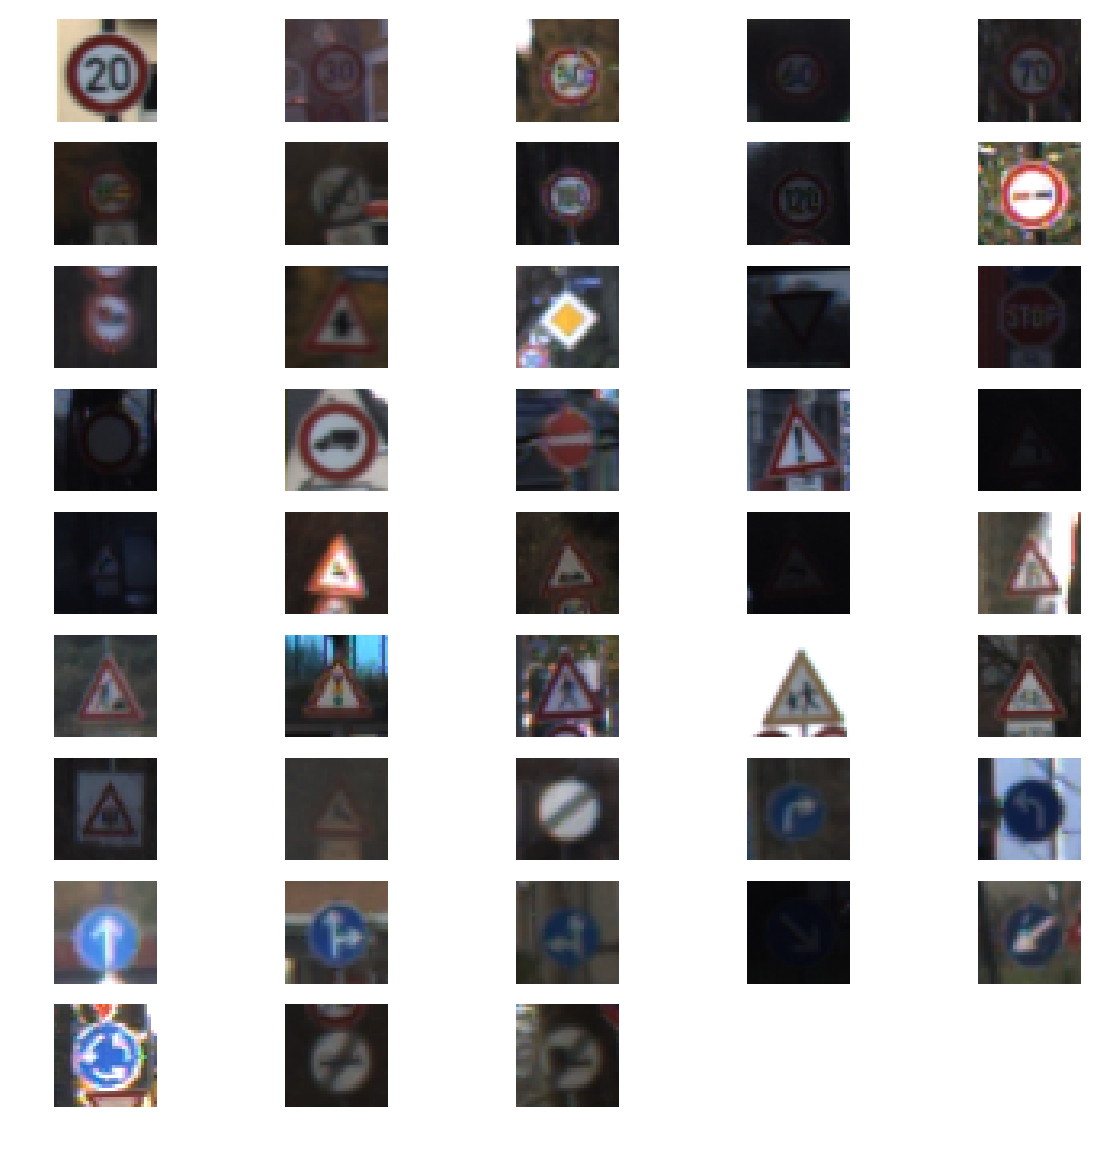

In [5]:
fig = plt.figure(figsize=(10,10))
gs_all = gridspec.GridSpec(9, 5)
for i in range(43):
    label_compare = np.argwhere(y_train == i)
    label_compare = label_compare.reshape(len(label_compare))
    gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_all[i])
    ax1 = plt.subplot(gs[0])
    ax1.imshow(X_train[label_compare[0]])
    ax1.axis('off')
plt.show()

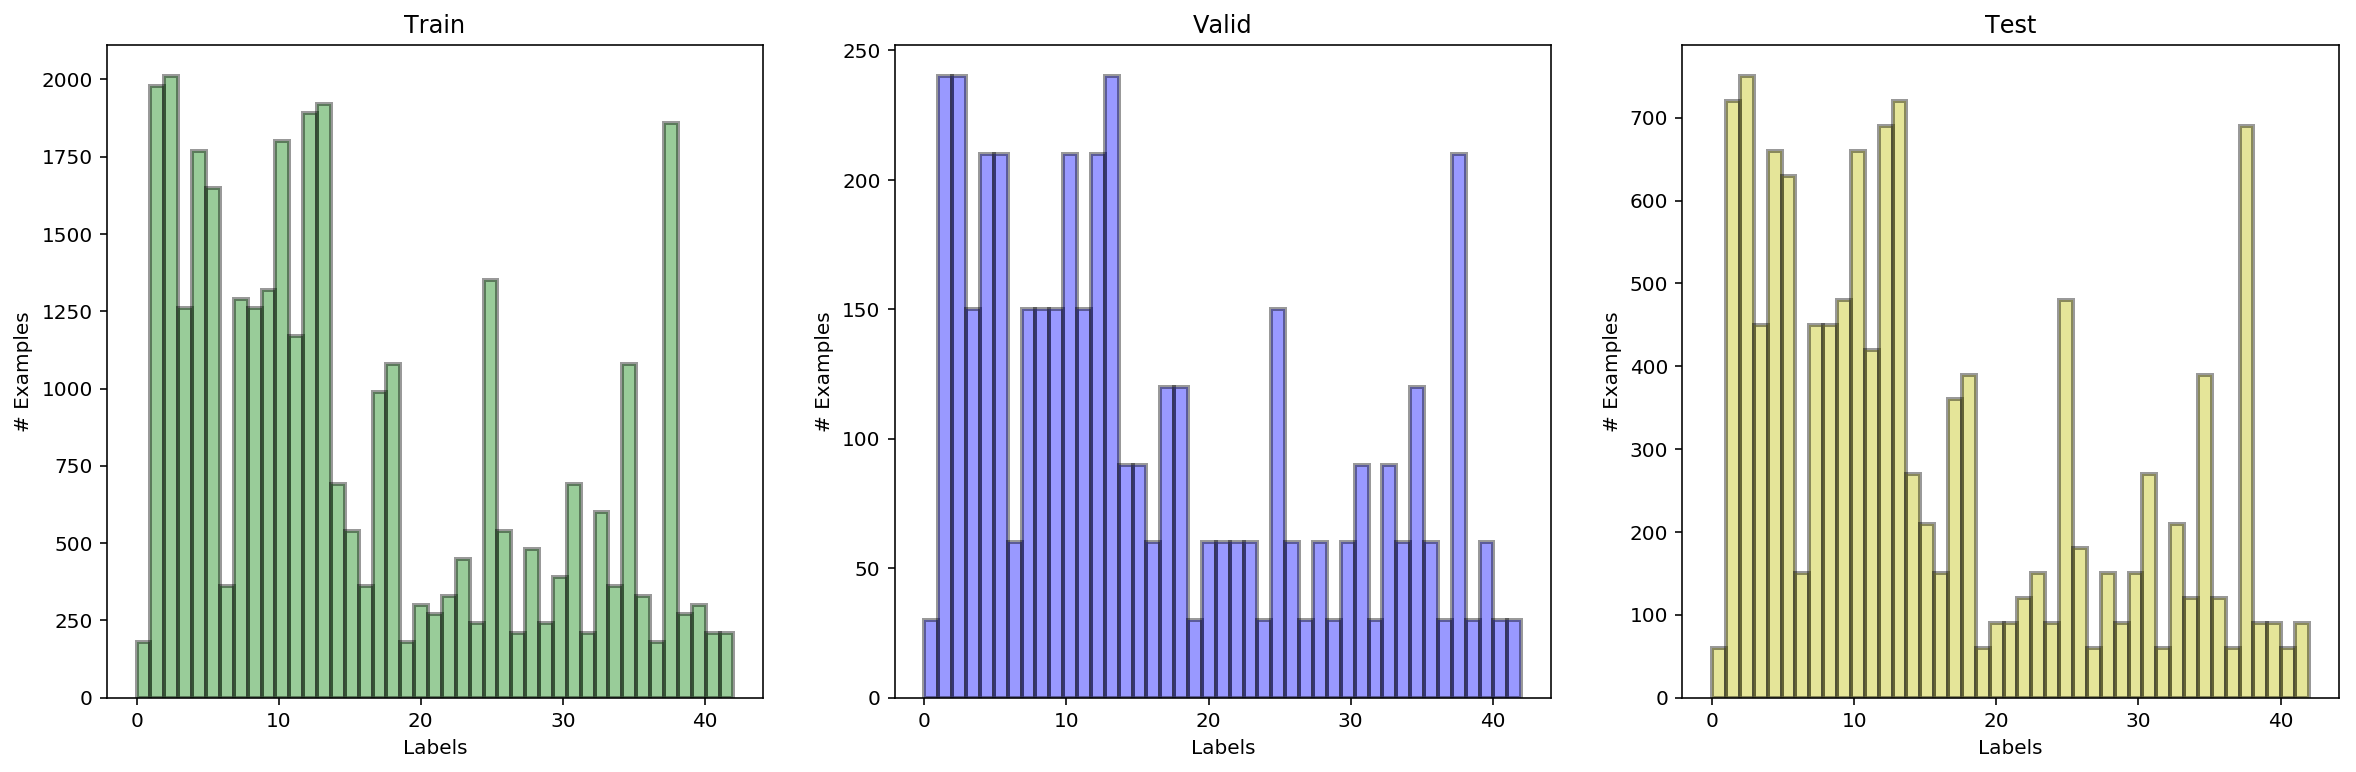

In [6]:
fig, axs = plt.subplots(ncols=3)
sns.distplot(y_train, bins=n_classes, kde=False,\
             hist_kws=dict(edgecolor="k", linewidth=2),\
             color='g', ax = axs[0])
sns.distplot(y_valid, bins=n_classes, kde=False, hist_kws=dict(edgecolor="k", linewidth=2), color='b', ax = axs[1])
sns.distplot(y_test, bins=n_classes, kde=False, hist_kws=dict(edgecolor="k", linewidth=2), color='y', ax = axs[2])
axs[0].set(xlabel='Labels', ylabel='# Examples', title='Train')
axs[1].set(xlabel='Labels', ylabel='# Examples', title='Valid')
axs[2].set(xlabel='Labels', ylabel='# Examples', title='Test');

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
#process images here
import tensorflow as tf
import cv2
def normalize_images(pre_image):
    processed_image = []
    img_shape = pre_image[0].shape
    for img in pre_image:
        img = (img) / 255. - 0.5
        processed_image.append(img)
    return np.array(processed_image, dtype=np.float32)

def brighten_image(pre_image):
    processed_image = []
    
    for img in pre_image:
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert it to hsv
        h, s, v = cv2.split(hsv)
        changer = 255 - ((v*0) + 30)
        np.putmask(v, changer < v, changer)
        v += 30
        final_hsv = cv2.merge((h, s, v))
        final_img = processed_image.append(cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR))
        
    return np.array(processed_image)

def contrast_image(pre_image):
    
    clahe = cv2.createCLAHE(clipLimit=25., tileGridSize=(1,32))

    lab = cv2.cvtColor(pre_image, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel

    lab = cv2.merge((l2,a,b))  # merge channels
    final_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    
    return final_img
def gray_scale(pre_image):
    processed_image = []
    for img in pre_image:
        processed_image.append(np.reshape(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY),(32,32,1)))
    return np.array(processed_image)
def get_stddev(w, conv_stride, num_layers):
    n = ((32-w)//conv_stride + 1) * ((32-w)//conv_stride + 1)  * num_layers
    return 1 / np.sqrt(n)

In [8]:
def get_batch(batch_size, features, labels):
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]
    

In [9]:
#Load in the different permutations of preprocessed images
start = time()
#X_train_norm = normalize_images(X_train)

#X_valid_norm = normalize_images(X_valid)

#X_test_norm = normalize_images(X_test)

#X_train_gray = gray_scale(X_train)

#X_valid_gray = gray_scale(X_valid)

#X_test_gray = gray_scale(X_test)

#X_train_gray_norm = normalize_images(X_train_gray)

#X_valid_gray_norm = normalize_images(X_valid_gray)

#X_test_gray_norm = normalize_images(X_test_gray)

X_train_bright = brighten_image(X_train)

X_valid_bright = brighten_image(X_valid)

X_test_bright = brighten_image(X_test)

X_train_bright_norm = normalize_images(X_train_bright)

X_valid_bright_norm = normalize_images(X_valid_bright)

X_test_bright_norm = brighten_image(X_test_bright)

X_train_bright_gray = gray_scale(X_train_bright)

X_valid_bright_gray = gray_scale(X_valid_bright)

X_test_bright_gray = gray_scale(X_test_bright)

X_train_bright_gray_norm = normalize_images(X_train_bright_gray)

X_valid_bright_gray_norm = normalize_images(X_valid_bright_gray)

X_test_bright_gray_norm = normalize_images(X_test_bright_gray)

end = time()
print(end - start)

7.381081819534302


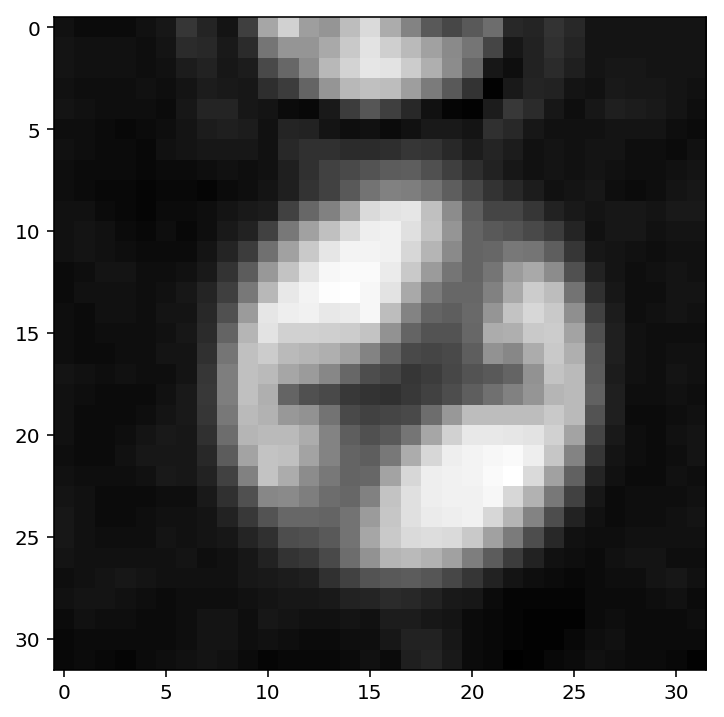

In [10]:
plt.imshow(X_train_bright_gray[0].reshape((32,32)), cmap='gray')

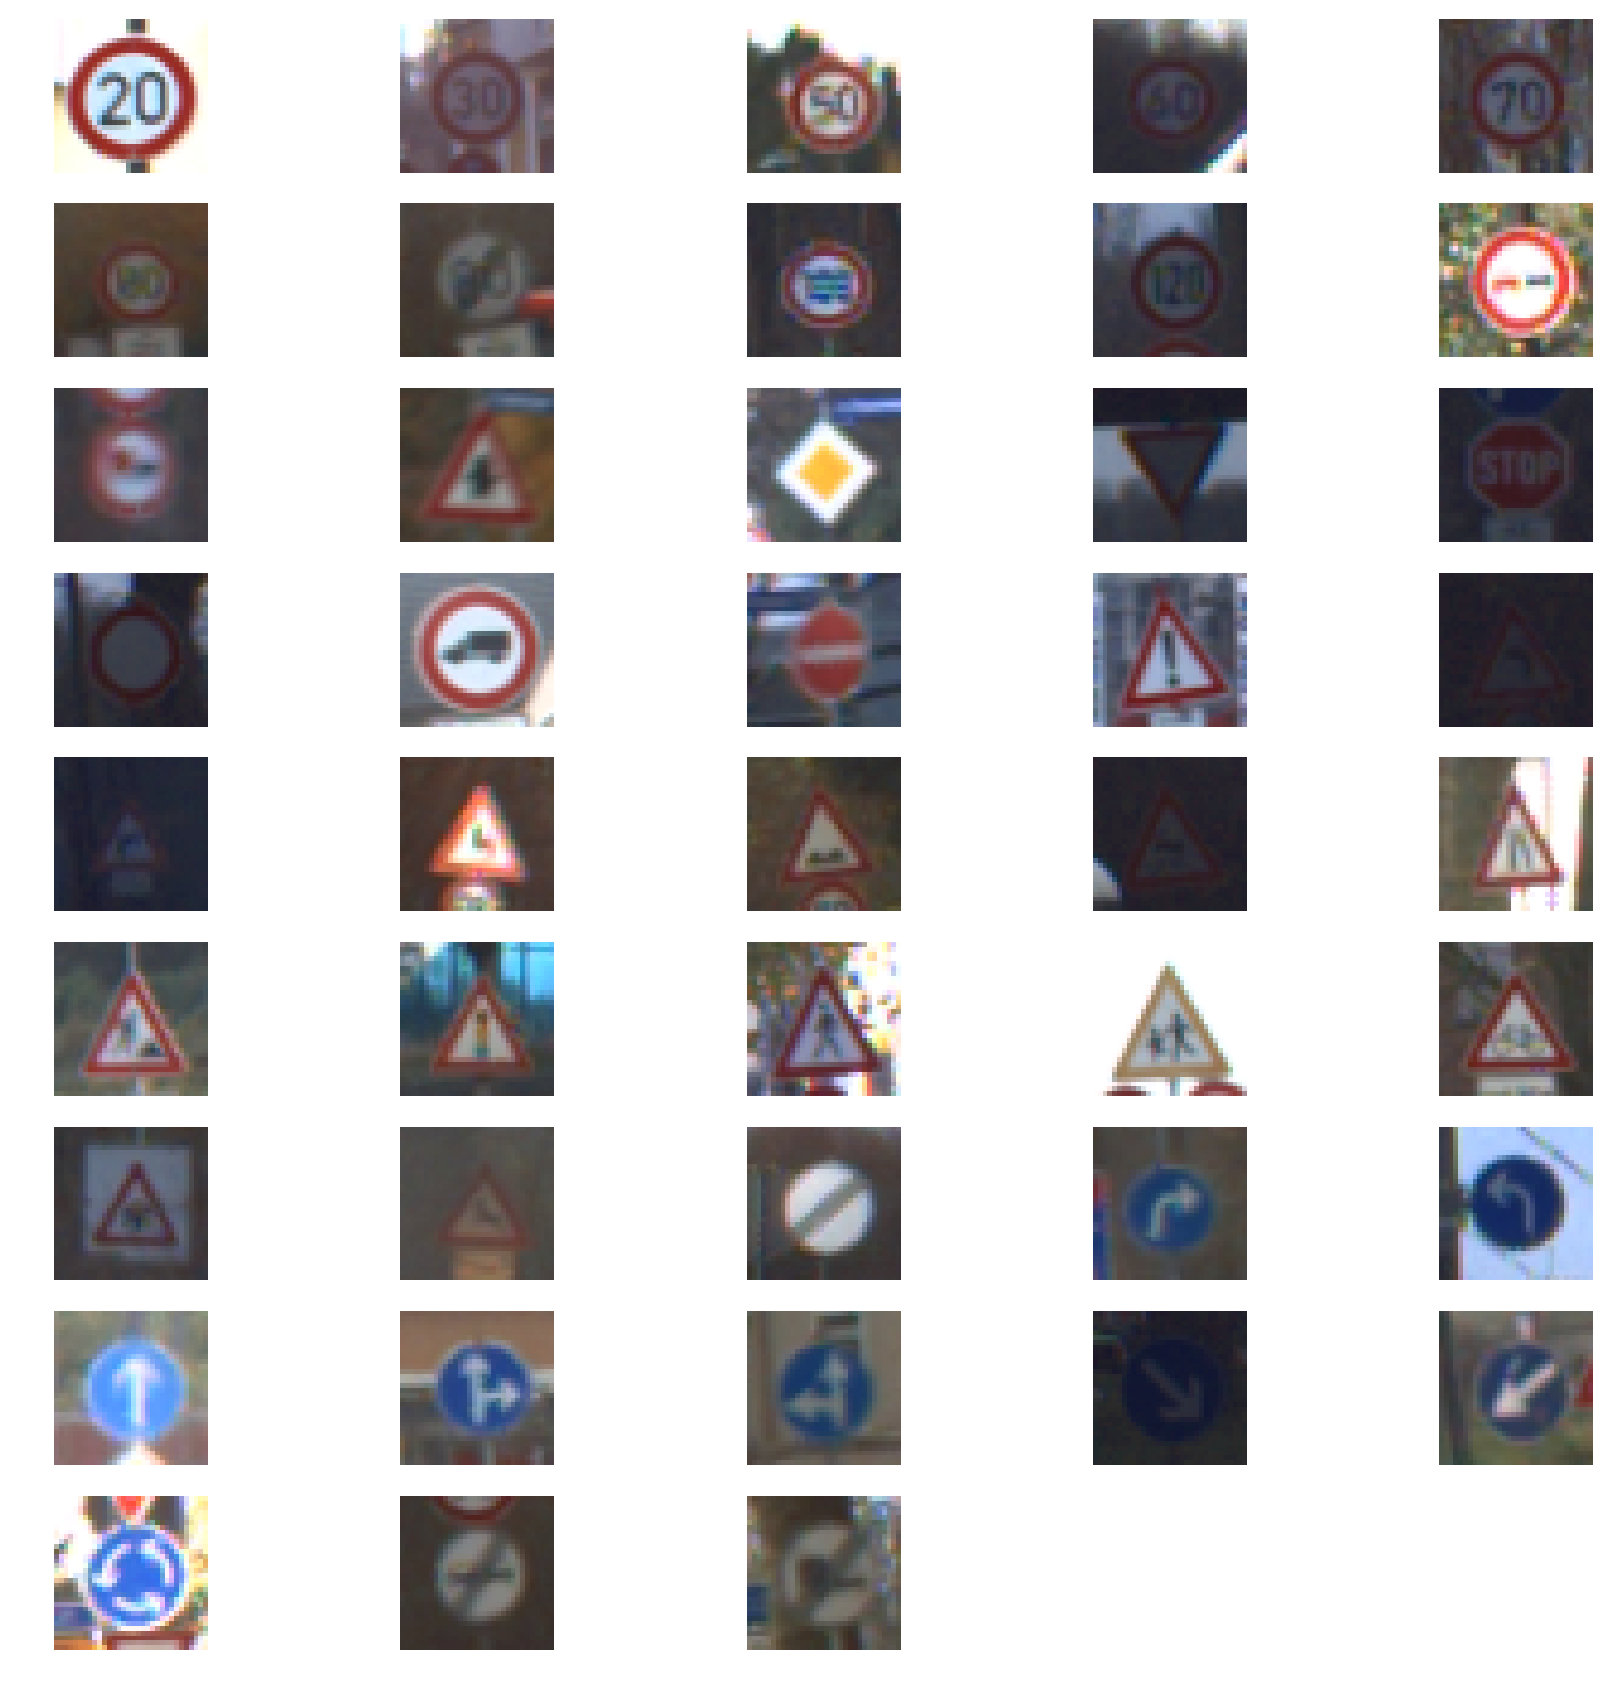

In [173]:
fig = plt.figure(figsize=(15,15))
gs_all = gridspec.GridSpec(9, 5)
for i in range(43):
    label_compare = np.argwhere(y_train == i)
    label_compare = label_compare.reshape(len(label_compare))
    gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_all[i])
    ax1 = plt.subplot(gs[0])
    ax1.imshow(X_train_bright[label_compare[6]])
    ax1.axis('off')
plt.show()

### Model Architecture

In [174]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [175]:
def inception(inputs, input_depth, output_depth):
    #input_shape = inputs.get_shape()[1]
    input_shape = 32
    std = input_shape * input_shape * output_depth
    std = 1 /np.sqrt(std)
    bias = tf.Variable(tf.zeros(output_depth*4))
    layer_5_w = tf.Variable(tf.truncated_normal([5, 5, input_depth, output_depth], stddev=std))
    layer_5 = tf.nn.conv2d(inputs, layer_5_w, strides=[1,1,1,1], padding='SAME')
    #lay_5_unstack = tf.unstack(layer_5)
    layer_5_len = tf.shape(layer_5)[0]
    
    layer_3_w = tf.Variable(tf.truncated_normal([3, 3, input_depth, output_depth], stddev=std))
    layer_3 = tf.nn.conv2d(inputs, layer_3_w, strides=[1,1,1,1], padding='SAME')
    
    layer_1_w = tf.Variable(tf.truncated_normal([1, 1, input_depth, output_depth], stddev=std))
    layer_1 = tf.nn.conv2d(inputs, layer_1_w, strides=[1,1,1,1], padding='SAME')
    
    layer_avg = tf.unstack(tf.nn.avg_pool(inputs, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME'), axis = 3)[0]
    layer_avg = tf.stack([layer_avg, layer_avg], axis=3)
    to_stack = tf.unstack(layer_avg, axis=3) + tf.unstack(layer_5, axis=3) +\
                tf.unstack(layer_3, axis=3) + tf.unstack(layer_1, axis=3)
    
    incep = tf.stack(to_stack, axis=3)
    
    incep = tf.nn.relu(incep)
    incep = tf.nn.max_pool(incep, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    return incep

In [176]:
#Reset graph to remove duplicate nodes
tf.reset_default_graph()

#Create placeholders necessary for the network (inputs, outputs dropout probability and learning rate
X = tf.placeholder(tf.float32, [None, 32, 32, 1], name='X')
y = tf.placeholder(tf.int32, [None], name='y')
one_hot_y = tf.one_hot(y, n_classes, name='one_hot_y')
lr = tf.placeholder(tf.float32, name='lr')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [177]:
#LeNet Implementation

#Create Convnet layers
#Convolution Network layer 1
#cl1 = inception(X, int(X.get_shape()[3]), 2)


cl1_std = get_stddev(5, 1, 12)
cl1_W = tf.Variable(tf.truncated_normal([5, 5, 1, 12], stddev=cl1_std))
cl1_b = tf.Variable(tf.zeros(12))
cl1 = tf.nn.conv2d(X, cl1_W, strides=[1,1,1,1], padding='VALID') + cl1_b

cl1 = tf.nn.relu(cl1)
cl1 = tf.nn.max_pool(cl1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

#Convolution Network layer 2
#cl2= inception(cl1, int(cl1.get_shape()[3]), 2)

cl2_std = get_stddev(5, 1, 24)
cl2_W = tf.Variable(tf.truncated_normal([5, 5, 12, 24], stddev=cl2_std))
cl2_b = tf.Variable(tf.zeros(24))
cl2 = tf.nn.conv2d(cl1, cl2_W, strides=[1,1,1,1], padding='VALID') + cl2_b
cl2 = tf.nn.relu(cl2)
cl2 = tf.nn.max_pool(cl2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

#Setup for Fully connected layers by flattening the Convolution network
flat = tf.contrib.layers.flatten(cl2)

# Fully Connected layer 1
fc1_std = 1/np.sqrt(600)
fc1_W = tf.Variable(tf.truncated_normal([600, 180], stddev=fc1_std))
fc1_b = tf.Variable(tf.zeros(180))
fc1 = tf.matmul(flat, fc1_W) + fc1_b
fc1 = tf.nn.relu(fc1)
fc1 = tf.nn.dropout(fc1, keep_prob)

#Fully Connected Layer 2
fc2_std = 1/np.sqrt(180)
fc2_W = tf.Variable(tf.truncated_normal([180, 84], stddev= fc2_std))
fc2_b = tf.Variable (tf.zeros(84))
fc2 = tf.matmul(fc1, fc2_W) + fc2_b
fc2 = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, keep_prob)

#Fully Connected Layer 3
fc3_std = 1/np.sqrt(84)
fc3_W = tf.Variable(tf.truncated_normal([84,43], stddev=fc3_std))
fc3_b = tf.Variable(tf.zeros(43))
#final model                                  
logits = tf.matmul(fc2, fc3_W) + fc3_b
tf.identity(logits, name='logits');

In [178]:
#Training
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name='cross_entropy')
loss_operation = tf.reduce_mean(cross_entropy)
#optimizer = tf.train.AdamOptimizer(learning_rate = lr)
optimizer = tf.train.RMSPropOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)

#accuracy                                   
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [180]:
# Set hyperparameters
learning_rate = 0.001
n_epochs = 60
batch_size = 512
keep_probability = 0.8

In [181]:
'''init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(cl1)
'''

'init = tf.global_variables_initializer()\nwith tf.Session() as sess:\n    sess.run(init)\n    print(cl1)\n'

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [182]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from time import time
init = tf.global_variables_initializer()

In [183]:
# train on all batches
with tf.Session() as sess:
    sess.run(init)
    n_batches = np.ceil(len(X_train) / batch_size)
    print(n_batches)
    start_t = None
    end_t = None
    t_acc = []
    v_acc = []
    d_points = 0
    for i in range(n_epochs):
        X_use, y_use = shuffle(X_train_bright_gray, y_train)
        batch_id = 1
        for features, labels in get_batch(batch_size, X_use, y_use):
            sess.run(training_operation, feed_dict={X: features, y: labels, keep_prob: keep_probability, lr: learning_rate})
            if batch_id % (n_batches // 4) == 0:    
                v_start = rd.randint(0, len(X_valid) - batch_size - 1)
                v_end = v_start + batch_size
                train_loss = sess.run(loss_operation, feed_dict={X: features, y: labels, keep_prob: 1.0})
                train_acc = sess.run(accuracy, feed_dict={X: features, y: labels, keep_prob: 1.0})
                t_acc.append(train_acc)
                valid_loss = sess.run(loss_operation,
                                      feed_dict={X: X_valid_bright_gray, y: y_valid, keep_prob: 1.0})
                valid_acc = sess.run(accuracy,
                                     feed_dict={X: X_valid_bright_gray, y: y_valid, keep_prob: 1.0})
                v_acc.append(valid_acc)
                print('Epoch {:>2} Batch {}:'.format(i, batch_id), end='')
                print("Train Loss = {}\nTrain Accuracy = {}".format(train_loss, train_acc))
                print("Valid Loss = {}\nValid Accuracy = {}".format(valid_loss, valid_acc))
                '''
                if start_t == None:
                    start_t = time()
                else:
                    end_t = time()
                    print("{} seconds passed between prints".format(end_t - start_t))
                    start_t = time()
                '''
                print()
                d_points += 1
            batch_id += 1
    
    save_model_path = './image_classification'
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

68.0
Epoch  0 Batch 17:Train Loss = 3.726797103881836
Train Accuracy = 0.07421875
Valid Loss = 3.7415425777435303
Valid Accuracy = 0.04693877696990967

Epoch  0 Batch 34:Train Loss = 3.700749397277832
Train Accuracy = 0.072265625
Valid Loss = 3.716937303543091
Valid Accuracy = 0.04988662153482437

Epoch  0 Batch 51:Train Loss = 3.5817480087280273
Train Accuracy = 0.107421875
Valid Loss = 3.6682345867156982
Valid Accuracy = 0.1090702936053276

Epoch  0 Batch 68:Train Loss = 3.5006399154663086
Train Accuracy = 0.13939394056797028
Valid Loss = 3.5657567977905273
Valid Accuracy = 0.12517006695270538

Epoch  1 Batch 17:Train Loss = 3.4632017612457275
Train Accuracy = 0.201171875
Valid Loss = 3.4837417602539062
Valid Accuracy = 0.1895691603422165

Epoch  1 Batch 34:Train Loss = 2.801541328430176
Train Accuracy = 0.271484375
Valid Loss = 2.980952262878418
Valid Accuracy = 0.23151926696300507

Epoch  1 Batch 51:Train Loss = 2.09637451171875
Train Accuracy = 0.470703125
Valid Loss = 2.322314500

Epoch 13 Batch 68:Train Loss = 0.006273673381656408
Train Accuracy = 0.9979798197746277
Valid Loss = 0.26787328720092773
Valid Accuracy = 0.942630410194397

Epoch 14 Batch 17:Train Loss = 0.007782683242112398
Train Accuracy = 1.0
Valid Loss = 0.25943416357040405
Valid Accuracy = 0.9435374140739441

Epoch 14 Batch 34:Train Loss = 0.006169487256556749
Train Accuracy = 1.0
Valid Loss = 0.27904024720191956
Valid Accuracy = 0.9417233467102051

Epoch 14 Batch 51:Train Loss = 0.011582037433981895
Train Accuracy = 0.998046875
Valid Loss = 0.28643617033958435
Valid Accuracy = 0.9453514814376831

Epoch 14 Batch 68:Train Loss = 0.011459377594292164
Train Accuracy = 0.9979798197746277
Valid Loss = 0.35762056708335876
Valid Accuracy = 0.9342403411865234

Epoch 15 Batch 17:Train Loss = 0.005810885690152645
Train Accuracy = 0.998046875
Valid Loss = 0.29611316323280334
Valid Accuracy = 0.9442176818847656

Epoch 15 Batch 34:Train Loss = 0.013503661379218102
Train Accuracy = 0.99609375
Valid Loss = 0.30

Epoch 27 Batch 68:Train Loss = 0.007653598673641682
Train Accuracy = 0.9979798197746277
Valid Loss = 0.4465332329273224
Valid Accuracy = 0.9328798055648804

Epoch 28 Batch 17:Train Loss = 0.0012689357390627265
Train Accuracy = 1.0
Valid Loss = 0.277948260307312
Valid Accuracy = 0.9535147547721863

Epoch 28 Batch 34:Train Loss = 0.0020283726043999195
Train Accuracy = 1.0
Valid Loss = 0.3683362305164337
Valid Accuracy = 0.9476190209388733

Epoch 28 Batch 51:Train Loss = 0.005915377289056778
Train Accuracy = 1.0
Valid Loss = 0.4696389138698578
Valid Accuracy = 0.9424036145210266

Epoch 28 Batch 68:Train Loss = 0.0028802596498280764
Train Accuracy = 1.0
Valid Loss = 0.4066971242427826
Valid Accuracy = 0.9482993483543396

Epoch 29 Batch 17:Train Loss = 0.0013753758976235986
Train Accuracy = 1.0
Valid Loss = 0.36919599771499634
Valid Accuracy = 0.9498866200447083

Epoch 29 Batch 34:Train Loss = 0.0032495411578565836
Train Accuracy = 0.998046875
Valid Loss = 0.39481598138809204
Valid Accuracy

Epoch 42 Batch 17:Train Loss = 0.0005018902011215687
Train Accuracy = 1.0
Valid Loss = 0.5219359993934631
Valid Accuracy = 0.9396825432777405

Epoch 42 Batch 34:Train Loss = 0.002775071654468775
Train Accuracy = 0.998046875
Valid Loss = 0.5655161738395691
Valid Accuracy = 0.9371882081031799

Epoch 42 Batch 51:Train Loss = 0.0003567504754755646
Train Accuracy = 1.0
Valid Loss = 0.3341701626777649
Valid Accuracy = 0.9551020264625549

Epoch 42 Batch 68:Train Loss = 0.00034755919477902353
Train Accuracy = 1.0
Valid Loss = 0.3583512008190155
Valid Accuracy = 0.956462562084198

Epoch 43 Batch 17:Train Loss = 0.023616012185811996
Train Accuracy = 0.998046875
Valid Loss = 0.40344375371932983
Valid Accuracy = 0.9471655488014221

Epoch 43 Batch 34:Train Loss = 0.0011240046005696058
Train Accuracy = 1.0
Valid Loss = 0.33240970969200134
Valid Accuracy = 0.9578231573104858

Epoch 43 Batch 51:Train Loss = 0.00542009761556983
Train Accuracy = 0.998046875
Valid Loss = 0.4402967393398285
Valid Accuracy

Epoch 56 Batch 34:Train Loss = 0.00019133604655507952
Train Accuracy = 1.0
Valid Loss = 0.5390587449073792
Valid Accuracy = 0.9514739513397217

Epoch 56 Batch 51:Train Loss = 0.004142336547374725
Train Accuracy = 0.998046875
Valid Loss = 0.451723575592041
Valid Accuracy = 0.9448979496955872

Epoch 56 Batch 68:Train Loss = 0.00045433008926920593
Train Accuracy = 1.0
Valid Loss = 0.3633672893047333
Valid Accuracy = 0.9573696255683899

Epoch 57 Batch 17:Train Loss = 0.00029024429386481643
Train Accuracy = 1.0
Valid Loss = 0.5169229507446289
Valid Accuracy = 0.9485260844230652

Epoch 57 Batch 34:Train Loss = 0.0004840903275180608
Train Accuracy = 1.0
Valid Loss = 0.4034273326396942
Valid Accuracy = 0.9598639607429504

Epoch 57 Batch 51:Train Loss = 0.0005913743516430259
Train Accuracy = 1.0
Valid Loss = 0.5287309288978577
Valid Accuracy = 0.9460317492485046

Epoch 57 Batch 68:Train Loss = 0.00017794952145777643
Train Accuracy = 1.0
Valid Loss = 0.40147867798805237
Valid Accuracy = 0.953061

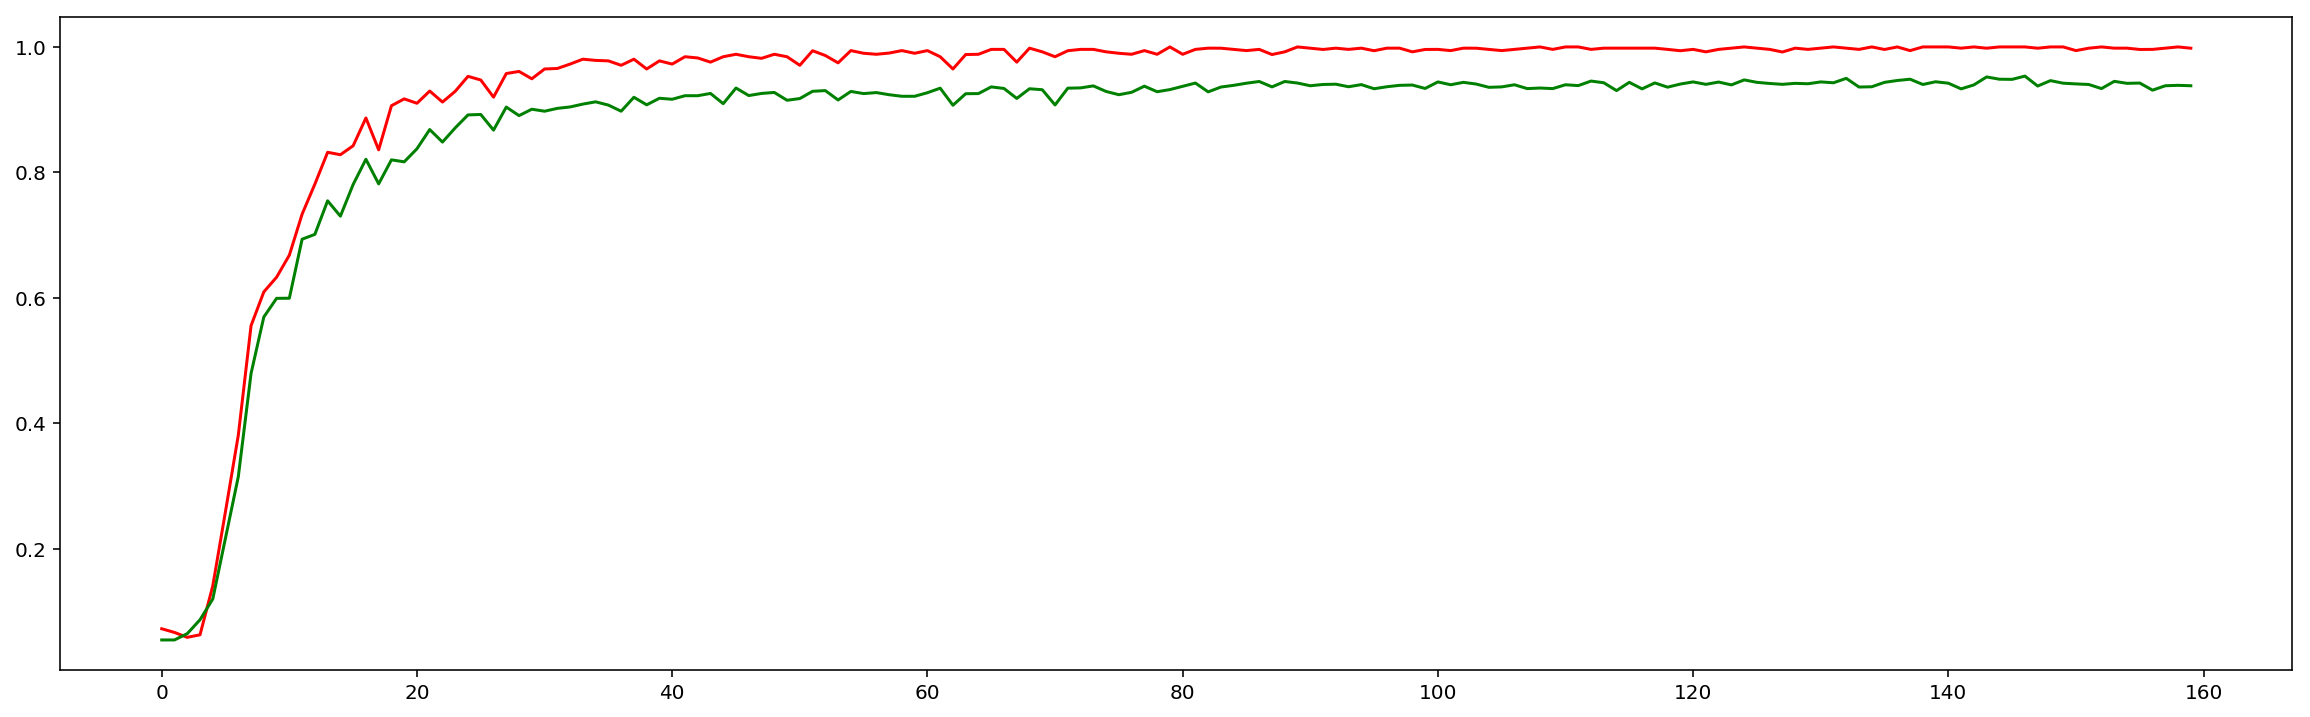

In [34]:
plt.plot(range(d_points),t_acc, 'r', range(d_points), v_acc, 'g');

In [11]:
import tensorflow as tf
tf.reset_default_graph()
loaded_graph = tf.Graph()
save_model_path = './image_classification'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    loaded_x = loaded_graph.get_tensor_by_name('X:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    test_acc = sess.run(loaded_acc,
                     feed_dict={loaded_x: X_valid_bright_gray, loaded_y: y_valid, loaded_keep_prob: 1.0})
    print(test_acc)

0.947619


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

AxesImage(180,54;1116x326.16)


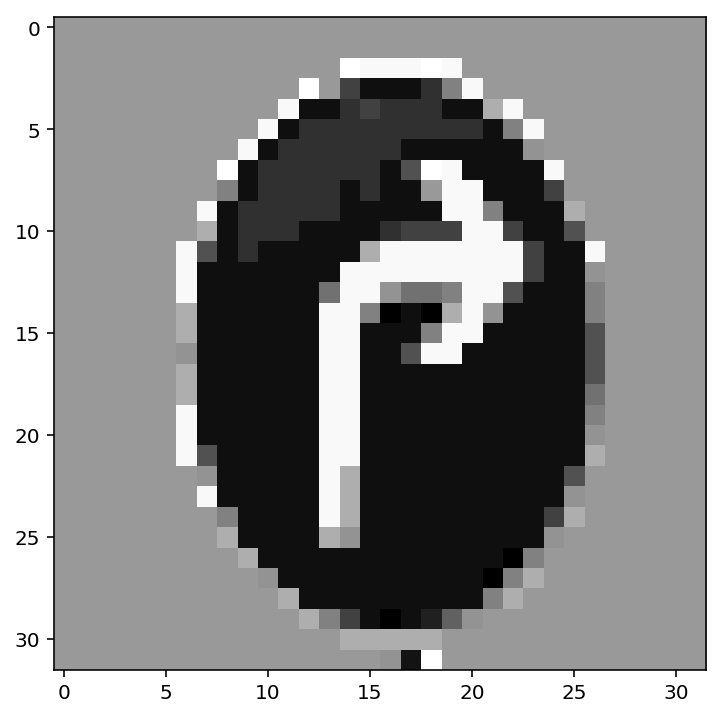

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed
from scipy import misc
import os
images_path = './test_images/'
test_images = [misc.imread(images_path + f) for f in os.listdir(images_path) if f.endswith('.bmp')]
bright_test_images = brighten_image(test_images)
gray_bright_test_images = gray_scale(test_images)
print(plt.imshow(gray_bright_test_images[0].reshape((32,32)),cmap='gray'))

### Predict the Sign Type for Each Image

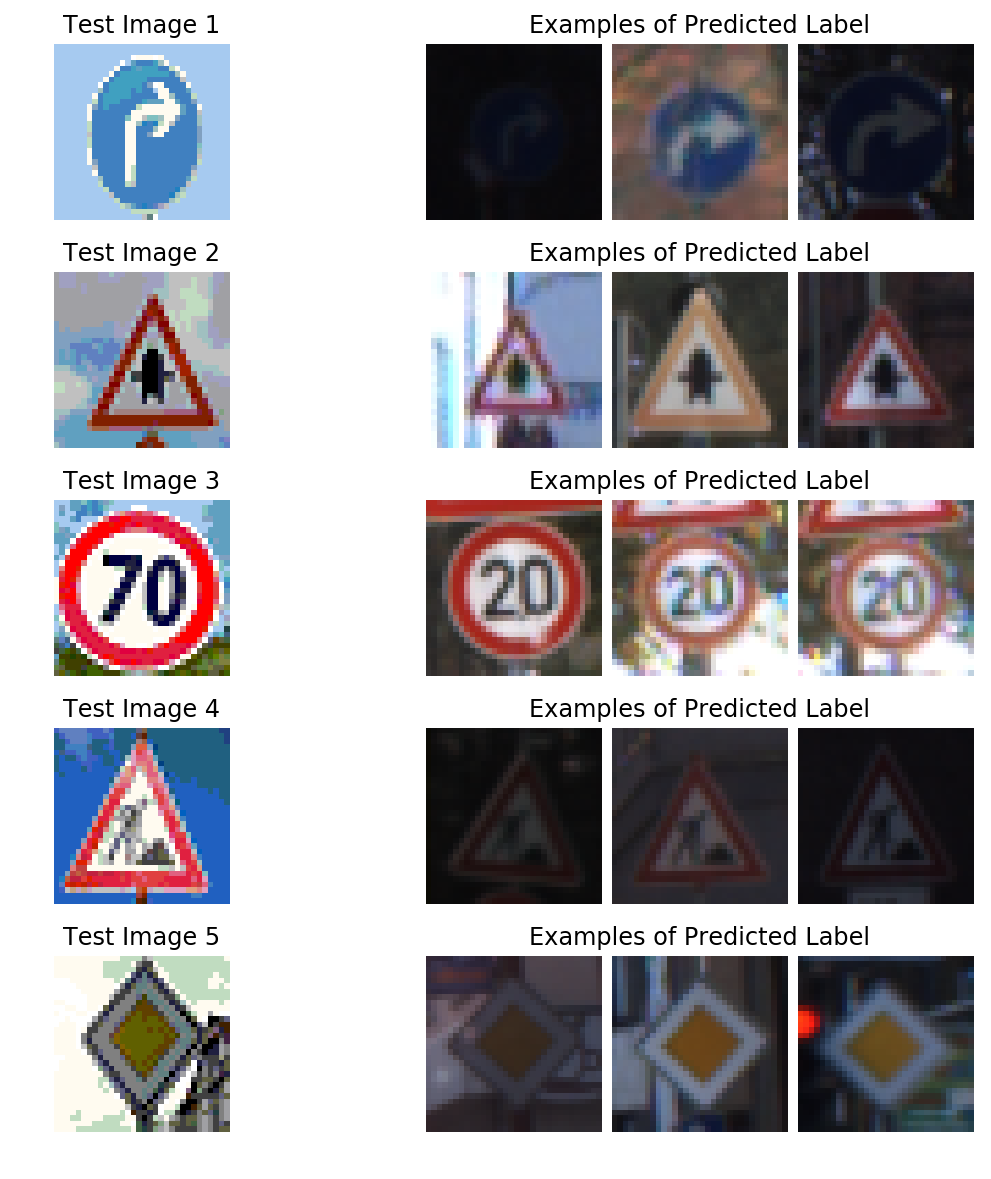

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = (10, 6)
tf.reset_default_graph()
loaded_graph = tf.Graph()
save_model_path = './image_classification'
top_k = None
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    loaded_x = loaded_graph.get_tensor_by_name('X:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    logits = sess.run(loaded_logits,
                     feed_dict={loaded_x: gray_bright_test_images, loaded_keep_prob: 1.0})
    
    
    f = plt.figure(figsize=(10,10))
    
    gs_main = gridspec.GridSpec(len(test_images), 1)
    gs_main.update(hspace=0.3)
    for i in range(len(test_images)):
        gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_main[i], wspace=0)
        gs_test = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0])
        gs_comp = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0)
        lab = np.argmax(logits[i])
        label_compare = np.argwhere(y_train == lab)
        label_compare = label_compare.reshape(len(label_compare))
        ax1 = plt.subplot(gs_test[0])
        ax1.imshow(test_images[i])
        ax2 = plt.subplot(gs_comp[0])
        ax2.imshow(X_train[label_compare[rd.randint(0, len(label_compare)-1)]])
        ax3 = plt.subplot(gs_comp[1])
        ax3.imshow(X_train[label_compare[rd.randint(0, len(label_compare)-1)]])
        ax4 = plt.subplot(gs_comp[2])
        ax4.imshow(X_train[label_compare[rd.randint(0, len(label_compare)-1)]])
        ax1.set_title('Test Image ' + str(i+1))
        ax1.axis('off')
        ax2.axis('off')
        ax3.axis('off')
        ax3.set_title('Examples of Predicted Label')
        ax4.axis('off')
     
    plt.show()
    soft_max = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(soft_max, k=5)
    test_top_labels = top_k.indices.eval()
    test_top_prob = top_k.values.eval()

### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

######################## ANSWER #################################################################
## Judging from the images printed above, the model predicts with 80% accuracy on the new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

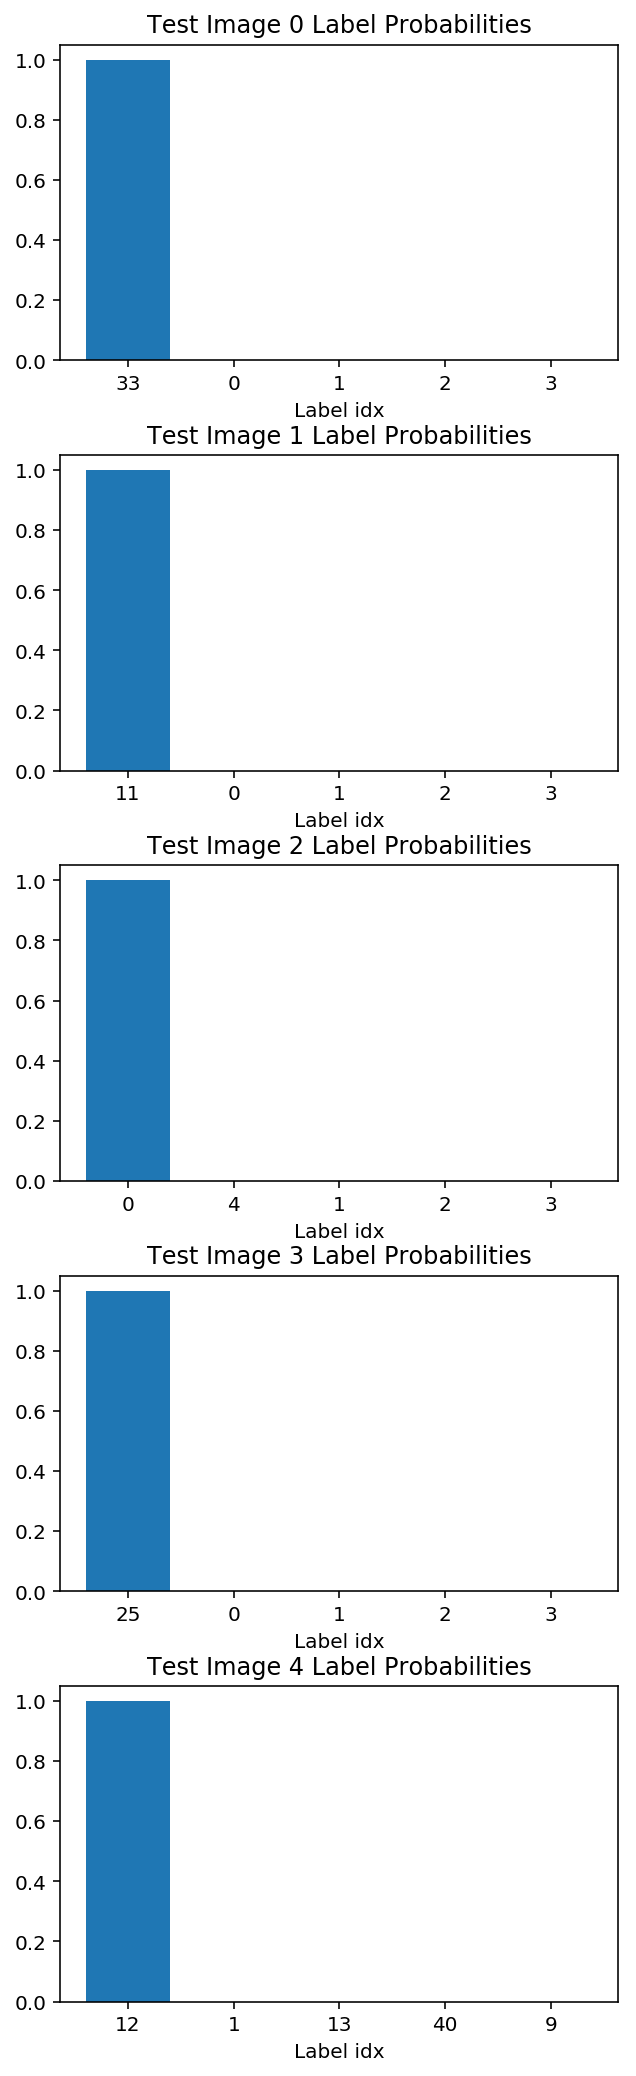

In [43]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

f = plt.figure(figsize=(5,18))

gs_main = gridspec.GridSpec(len(test_images), 1)
gs_main.update(hspace=0.3)
for i in range(len(test_images)):
    ax = plt.subplot(gs_main[i])
    ax.bar(np.arange(5), test_top_prob[i], align='center')
    plt.title('Test Image ' + str(i) +' Label Probabilities')
    plt.xticks(np.arange(5), test_top_labels[i])
    plt.xlabel('Label idx')
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")